## homework 1

In [1]:
import pandas as pd

df_raw_data = pd.read_excel("dataset.xls", header=None)

### Find mean values by cols


In [2]:
# Возмоэно стоит переименовать колонки для ясности?

NAME_OF_FEATURES = ['FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4', 'FEATURE5', 'FEATURE6']

df_raw_data.columns = NAME_OF_FEATURES

for col in df_raw_data.columns:
    print(f"Mean value for colunmn {col} = {df_raw_data[col].mean()}")
    print('\n')

Mean value for colunmn FEATURE1 = 39.298507462686565


Mean value for colunmn FEATURE2 = 2.0869565217391304


Mean value for colunmn FEATURE3 = 19861.764705882353


Mean value for colunmn FEATURE4 = 10.101449275362318


Mean value for colunmn FEATURE5 = 20852.941176470587


Mean value for colunmn FEATURE6 = 198492.53731343284




### find std for cols

In [3]:
for col in df_raw_data.columns:
    print(f"standart deviation for colunmn {col} = {df_raw_data[col].std()}")
    print('\n')

standart deviation for colunmn FEATURE1 = 8.700426540176295


standart deviation for colunmn FEATURE2 = 0.9961562958335907


standart deviation for colunmn FEATURE3 = 10169.342710701167


standart deviation for colunmn FEATURE4 = 4.932321156044054


standart deviation for colunmn FEATURE5 = 10692.813468731472


standart deviation for colunmn FEATURE6 = 99837.3485003769




### find median 

In [4]:
for col in df_raw_data.columns:
    print(f"median for colunmn {col} = {df_raw_data[col].median()}")
    print('\n')

median for colunmn FEATURE1 = 38.0


median for colunmn FEATURE2 = 2.0


median for colunmn FEATURE3 = 20250.0


median for colunmn FEATURE4 = 9.0


median for colunmn FEATURE5 = 20500.0


median for colunmn FEATURE6 = 200000.0




### find Q1(25%), Q2(50%), Q3(75%)

In [5]:
for col in df_raw_data.columns:
    print(f"Q1 for colunmn {col} = {df_raw_data[col].quantile(0.25)}")
    print(f"Q2 for colunmn {col} = {df_raw_data[col].quantile(0.5)}")
    print(f"Q3 for colunmn {col} = {df_raw_data[col].quantile(0.75)}")
    print('\n')

Q1 for colunmn FEATURE1 = 34.0
Q2 for colunmn FEATURE1 = 38.0
Q3 for colunmn FEATURE1 = 46.0


Q1 for colunmn FEATURE2 = 1.0
Q2 for colunmn FEATURE2 = 2.0
Q3 for colunmn FEATURE2 = 3.0


Q1 for colunmn FEATURE3 = 11125.0
Q2 for colunmn FEATURE3 = 20250.0
Q3 for colunmn FEATURE3 = 27125.0


Q1 for colunmn FEATURE4 = 7.0
Q2 for colunmn FEATURE4 = 9.0
Q3 for colunmn FEATURE4 = 14.0


Q1 for colunmn FEATURE5 = 12000.0
Q2 for colunmn FEATURE5 = 20500.0
Q3 for colunmn FEATURE5 = 28000.0


Q1 for colunmn FEATURE6 = 118000.0
Q2 for colunmn FEATURE6 = 200000.0
Q3 for colunmn FEATURE6 = 265500.0




### plot hist of features

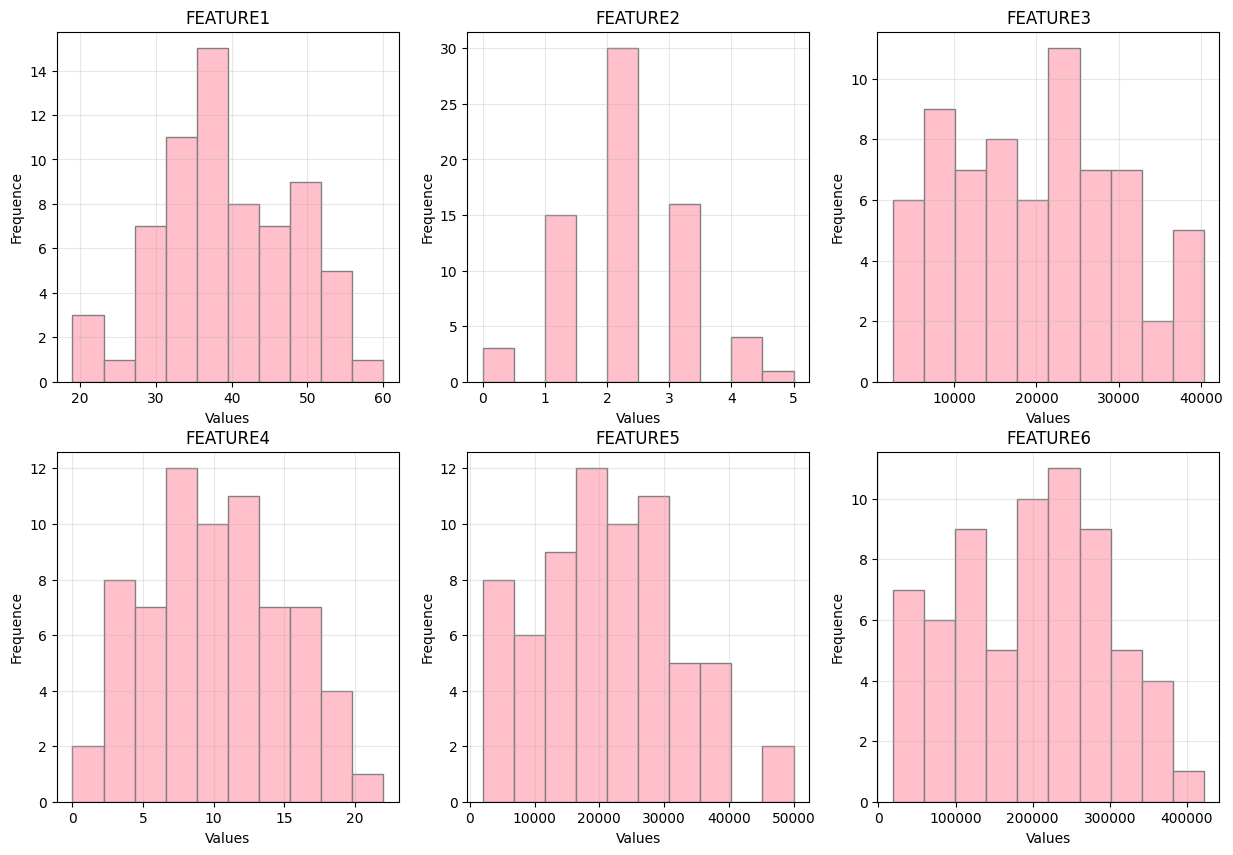

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    axes[i].hist(df_raw_data[col], color='pink', edgecolor='grey', bins=10)
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequence')
    axes[i].grid(alpha=0.3)



### plot boxplots

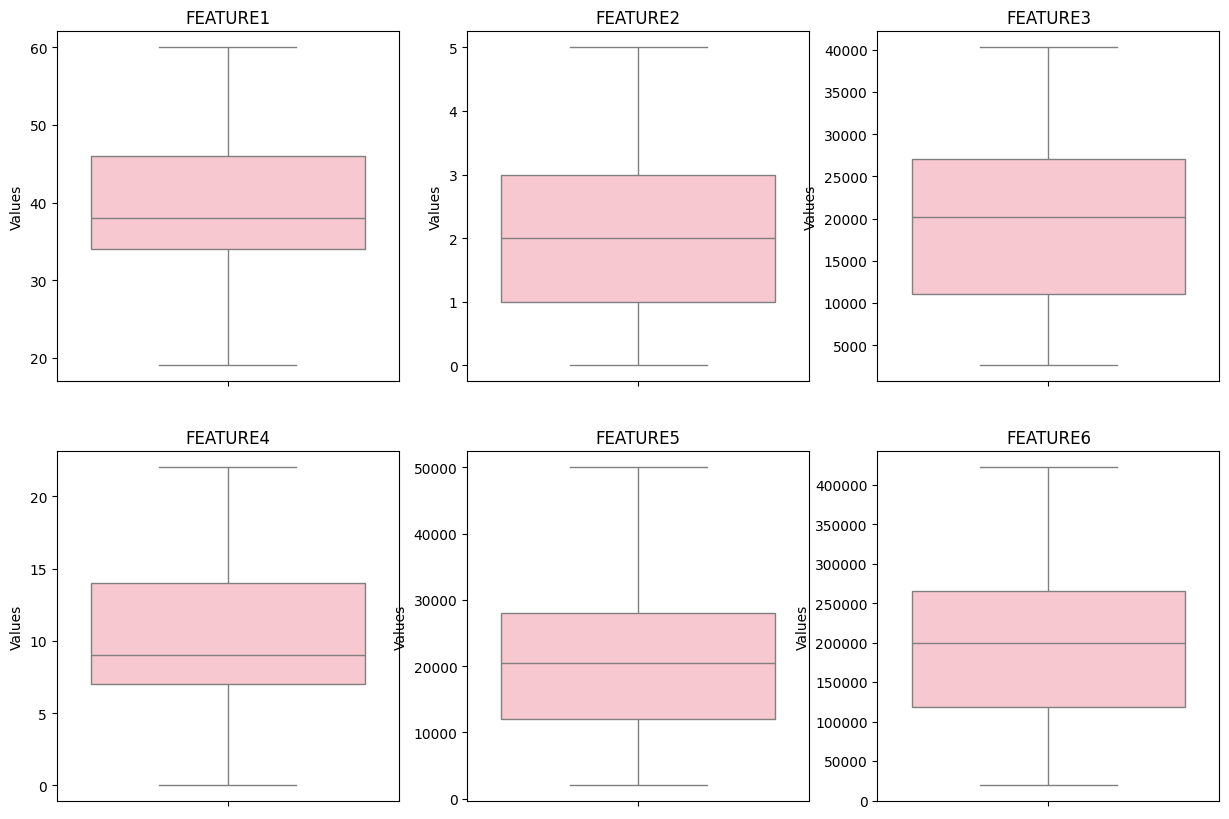

In [7]:
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    sns.boxplot(data=df_raw_data, y=col, ax=axes[i], color='pink', linecolor='grey')
    axes[i].set_title(col)
    axes[i].set_ylabel("Values")
    

# end of task 1 + сделать выводы 


# task 2 - восстановление пропущенных значений 


In [8]:
# найдем процентное соотношение пропусков 

print(f'В процентах\n{(df_raw_data.isnull().sum() / df_raw_data.count()) * 100} ')

В процентах
FEATURE1    7.462687
FEATURE2    4.347826
FEATURE3    5.882353
FEATURE4    4.347826
FEATURE5    5.882353
FEATURE6    7.462687
dtype: float64 


### так как процент небольшой, но больше 5 процентов воспользуемся методом knn 

In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='distance')

df_data_wo_nans = imputer.fit_transform(df_raw_data)

In [10]:
df_data_wo_nans = df_data_wo_nans.round(0)
df_data_wo_nans = pd.DataFrame(df_data_wo_nans)
type(df_data_wo_nans)

pandas.core.frame.DataFrame

## end of task 2 - возможно нужен метод полегче

## task 3 - определение выбросов и их устранение 

Так как вид распределения нам неизвестен точно, то используем метод IQR 

In [11]:
k = 0.3

for col in df_data_wo_nans.columns:
    q1 = df_data_wo_nans[col].quantile(0.25)
    q3 = df_data_wo_nans[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr 
    upper_bound = q3 + k * iqr 

    print(f'for {col} low = {lower_bound}, upp = {upper_bound}')

    df_data_wo_nans_and_outliers = df_data_wo_nans.loc[df_data_wo_nans[col].between(lower_bound, upper_bound)]

for 0 low = 30.55, upp = 48.95
for 1 low = 0.4, upp = 3.6
for 2 low = 6535.0, upp = 31015.0
for 3 low = 4.9, upp = 16.1
for 4 low = 7200.0, upp = 32800.0
for 5 low = 78125.0, upp = 308125.0


In [12]:
print(f'rows in old df = {df_data_wo_nans.shape[0]}')
print(f'rows in new df = {df_data_wo_nans_and_outliers.shape[0]}')

rows in old df = 72
rows in new df = 53


## PCA

### центрированные данные X_centr = X - mean(X)

In [32]:
import numpy as np

x = np.array(df_data_wo_nans_and_outliers)

In [33]:
# centered data

for col in range(x.shape[1]):
    npcol = x[:, col]
    print(npcol)
    print(npcol.mean())
    npcol -= npcol.mean()


[38. 47. 39. 51. 33. 54. 28. 35. 30. 26. 44. 38. 39. 19. 48. 35. 36. 49.
 48. 34. 34. 51. 44. 41. 44. 30. 41. 44. 50. 28. 21. 29. 54. 37. 48. 44.
 53. 47. 37. 50. 36. 34. 45. 40. 48. 36. 40. 33. 60. 39. 45. 39. 52.]
40.471698113207545
[2. 2. 2. 3. 1. 4. 1. 2. 1. 0. 2. 2. 3. 2. 3. 2. 2. 3. 3. 1. 1. 3. 2. 2.
 2. 1. 2. 3. 3. 1. 3. 1. 4. 2. 2. 3. 4. 3. 2. 3. 2. 1. 3. 2. 3. 2. 2. 2.
 5. 2. 1. 2. 3.]
2.2264150943396226
[22600. 11200. 22500. 16000. 29900. 17300. 26100. 27100. 21859. 14600.
  8800. 23400. 37100.  8000.  9500. 30500. 26200. 10200. 11400. 20800.
 27200. 18600. 11300. 15800.  8300. 17468. 30500. 21900. 13800. 22300.
  8200. 25000. 23100. 23500.  7700. 25900. 16700. 16700. 28800. 18400.
 28900. 15000. 18200. 22893. 12700. 24800. 19800. 30100. 24300. 10900.
 20700. 23700. 15900.]
19700.377358490565
[ 8. 14.  9. 17.  5. 19.  3.  7.  4.  2. 13.  8.  9. 12. 15.  7.  8. 16.
 15.  6.  6. 17. 13. 11. 12.  4. 10. 12. 16.  3. 11.  3. 18.  8. 15. 12.
 18. 17.  8. 16.  7.  7. 13.  9. 15.  9.

In [34]:
# проверка на центрирование 

print(np.mean(x, axis=0))

[ 2.54722868e-15  5.02742502e-17  1.23553997e-12 -3.01645501e-16
  6.17769986e-13  1.15317064e-11]


In [ ]:
# norm data

from numpy.linalg import linalg

for col in range(x.shape[1]):
    print(np.linalg.norm(x[:, col]))
    x[:, col]  = x[:, col] / np.linalg.norm(x[:, col])

63.586221362570456
6.87626489221616
51756.23968617533
35.86347277168349
60774.00044520031
459177.181989821


In [43]:
print(np.linalg.norm(x, axis=0))

[1. 1. 1. 1. 1. 1.]


In [44]:
new_matr = pd.DataFrame(x)

## TASK 4 - done

## TASK 5 - find SVD 

In [53]:
u, s, vt = np.linalg.svd(x)

In [55]:
pd_u = pd.DataFrame(u)
pd_s = pd.DataFrame(s)
pd_vt = pd.DataFrame(vt)

## TASK 5 - done

## TASK 6 - factors

In [61]:
sum_of_factors = np.sum(s**2)
print(sum_of_factors)

for item in s:
    print(f'% of data = {round(item / sum_of_factors, 2)}')

5.999999999999997
% of data = 0.3
% of data = 0.23
% of data = 0.14
% of data = 0.07
% of data = 0.04
% of data = 0.03


## Факторы 1, 2, 3 объясняют 67% данных - уточнить 


In [71]:
approx_col = list()

for i in range(6):
    tmp = np.array(s[0] * vt[i, 0] * u[:, 0] + s[1] * vt[i, 1]* u[:, 1] + s[2] * vt[i, 2] * u[:, 2]) 
    approx_col.append(tmp)

approx_matr = np.array(approx_col).T

### find norms (operations & Frob)

### По теореме Энкера-Юнга следует

$$ min_{rank = k}||Z - Z_k||_2 = \sigma_{k+1} $$

$$ min_{rank = k}||Z - Z_k||^2_F = \sigma_{k+1}^2 + ... + \sigma_{p}^2 $$

In [75]:
p = min(x.shape)
print(f'p = {p}')
print(f'k = {3}')

p = 6
k = 3


In [77]:
norm_oper = s[3]
print(f'Operation norm = {norm_oper}')

Operation norm = 0.441250548457645


In [80]:
frob_norm = 0

for i in range(3,6):
    frob_norm += s[i]**2

print(frob_norm)

0.27920017400546665


## что-то не сходится - проверить матрицу Z_k и вычисление ошибок